In [22]:
library(ggplot2)
library(MASS)

In [2]:
mpg2 = subset(mpg, cyl != 5 & drv %in% c('4','f') & class != '2seater')

In [3]:
base <- ggplot(mpg2, aes(displ, hwy)) +
        geom_blank() +
        xlab(NULL) +
        ylab(NULL)

##### Displaying facet with different paramaters

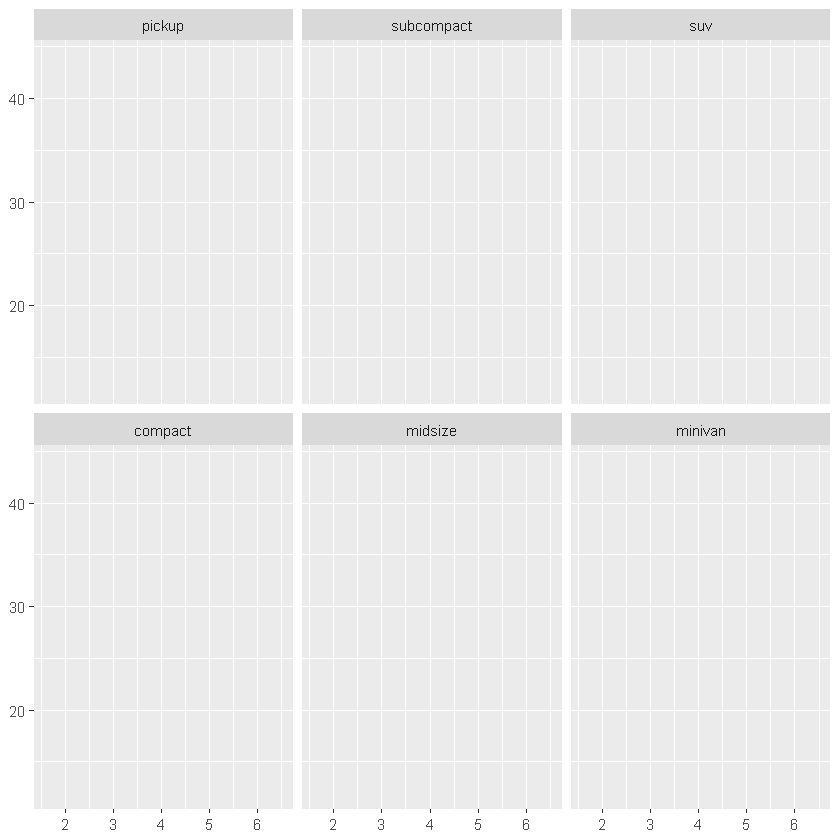

In [4]:
#base + facet_wrap(~class, ncol=3) # display the data in 3 columns
base  + facet_wrap(~class, ncol=3, as.table = F) # Highest values at the top right with as.table=F

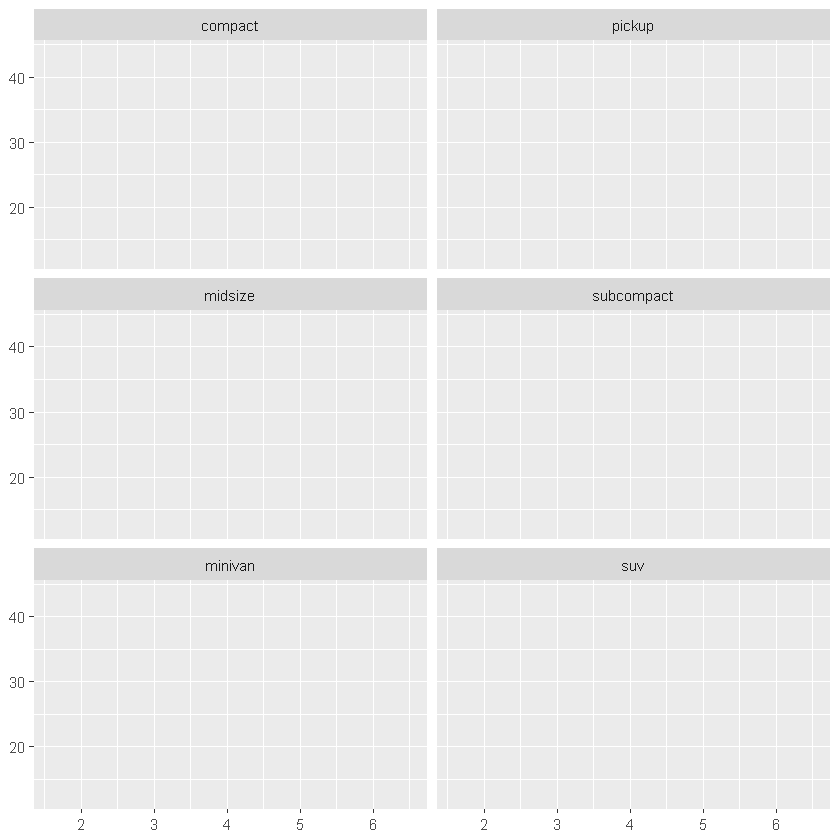

In [5]:
# base + facet_wrap(~class, nrow=3)
base + facet_wrap(~class, nrow=3, dir = "v") # Plot the panels top to bottom as they come

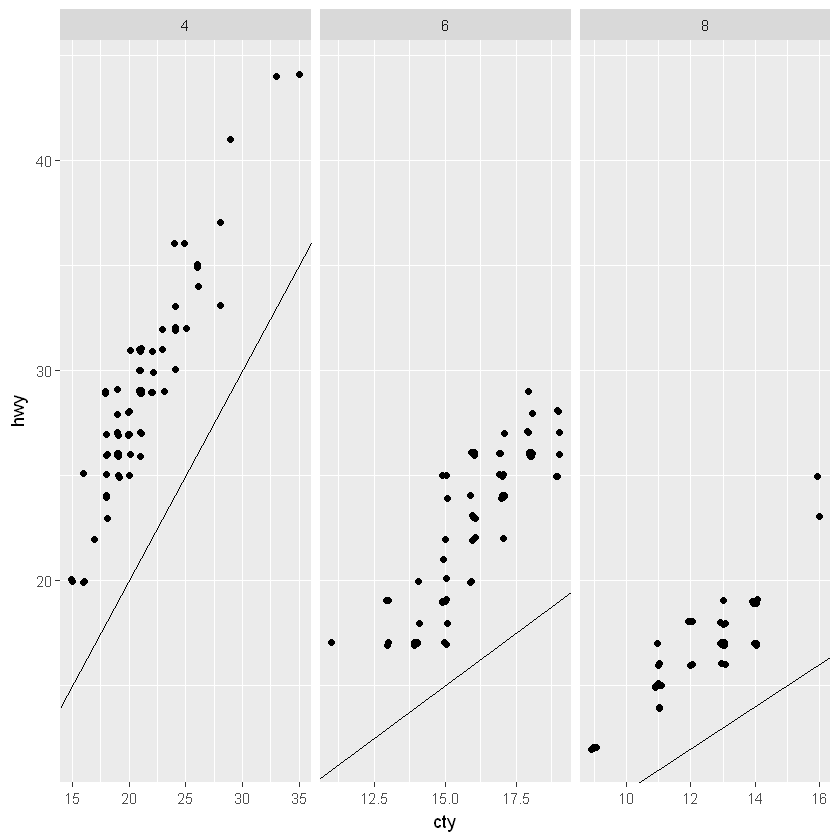

In [9]:
# Scales for facets
p = ggplot(mpg2, aes(cty, hwy)) +
        geom_jitter(width = 0.1, height = 0.1) +
        geom_abline()
#p + facet_wrap(~cyl) # Default scales where both the x and y axes are fixed
#p + facet_wrap(~cyl, scales="free") # where both the axes are free
p + facet_wrap(~cyl, scales = "free_x") # x scale is free and y is fixed

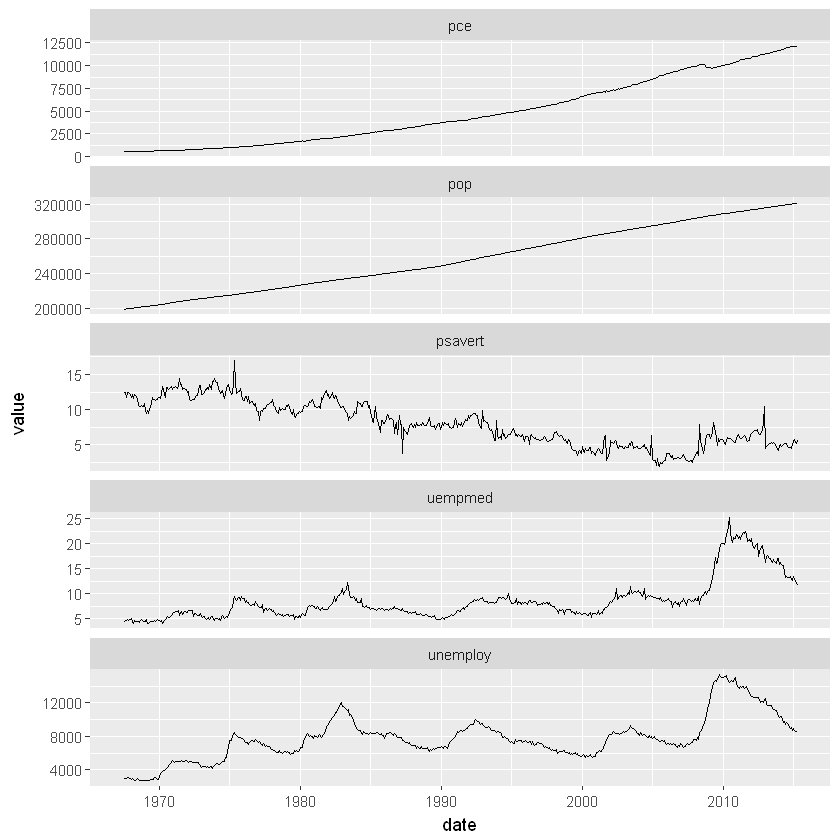

In [11]:
# Displaying multiple time series that were measured on different y scales
ggplot(economics_long, aes(date, value)) +
    geom_line() +
    facet_wrap(~variable, scales = "free_y", ncol=1) 
# set the y axis as free depending on data and let all the plots stack on each other in one column

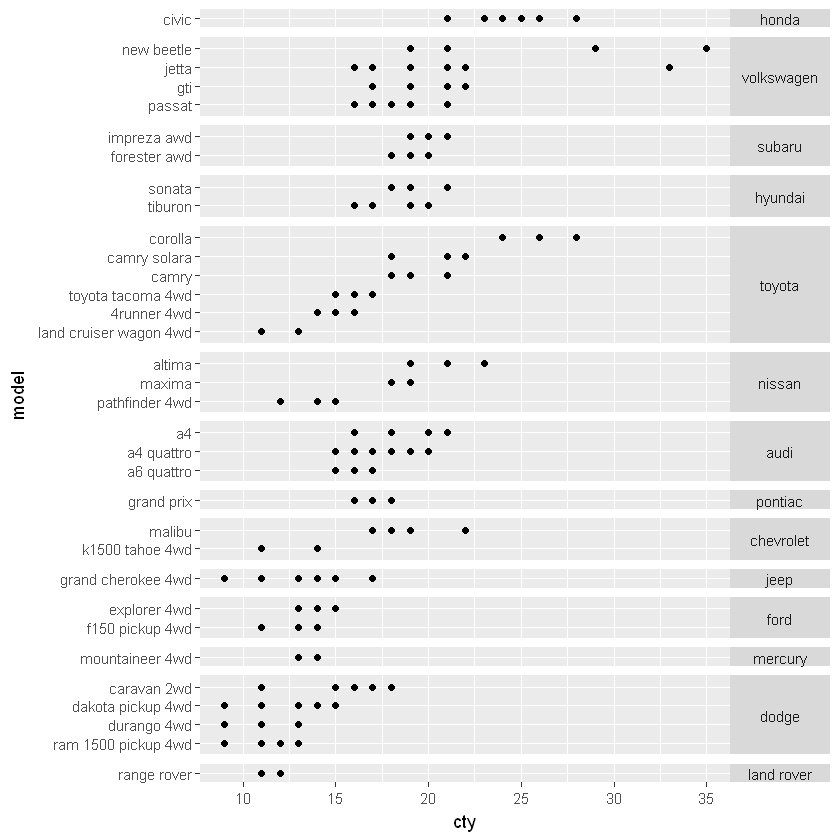

In [24]:
# using the "space" option in facet_grid which assigns space depending on range of the data.
mpg2$model = reorder(mpg2$model, mpg2$cty)
mpg2$manufacturer = reorder(mpg2$manufacturer, -mpg2$cty)
ggplot(mpg2, aes(cty, model)) +
    geom_point() +
    facet_grid(manufacturer~., scales = "free", space = "free") +
    theme(strip.text.y=element_text(angle=0))

In [35]:
linmod = lm(hwy ~ displ+year+cyl+drv+class, data=mpg[-c(212, 222, 223),])

In [36]:
summary(linmod)


Call:
lm(formula = hwy ~ displ + year + cyl + drv + class, data = mpg[-c(212, 
    222, 223), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8568 -0.9197 -0.0844  0.9507 14.4614 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -235.81713   63.28824  -3.726 0.000248 ***
displ             -0.58752    0.39188  -1.499 0.135256    
year               0.13609    0.03165   4.301 2.57e-05 ***
cyl               -1.25611    0.25248  -4.975 1.32e-06 ***
drvf               2.98686    0.51394   5.812 2.17e-08 ***
drvr               1.49943    0.63786   2.351 0.019626 *  
classcompact      -3.54117    1.27222  -2.783 0.005848 ** 
classmidsize      -3.94111    1.25459  -3.141 0.001914 ** 
classminivan      -8.11312    1.35322  -5.995 8.28e-09 ***
classpickup       -8.55925    1.20174  -7.122 1.51e-11 ***
classsubcompact   -3.78934    1.24047  -3.055 0.002532 ** 
classsuv          -7.65209    1.12834  -6.782 1.09e-10 ***
---
Signif. codes:  0 '***

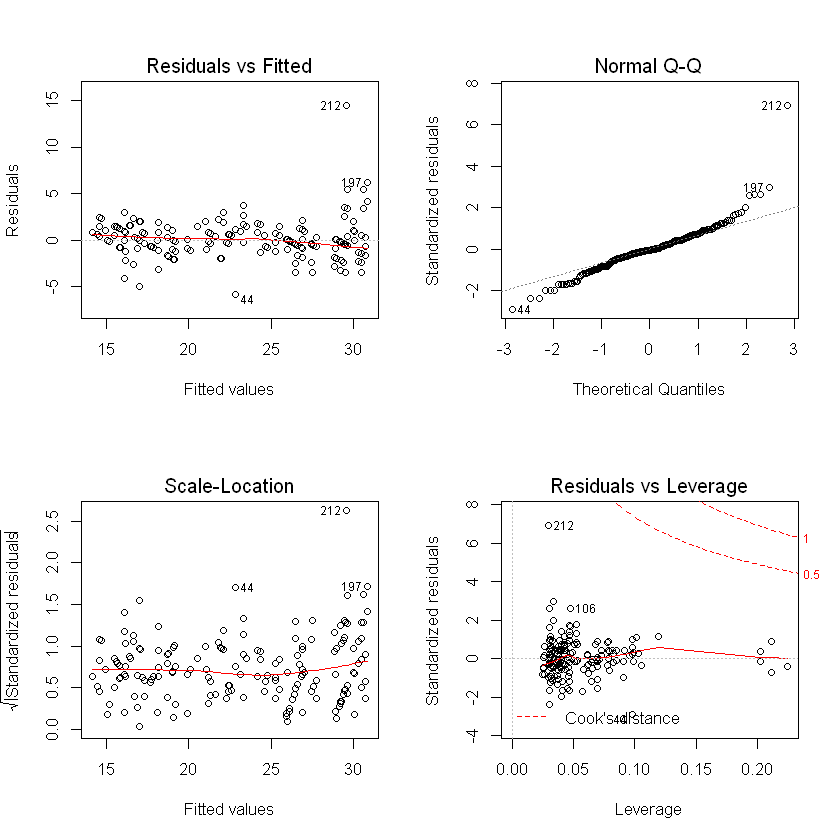

In [37]:
par(mfrow=c(2,2))
plot(linmod)

In [38]:
shapiro.test(studres(linmod))


	Shapiro-Wilk normality test

data:  studres(linmod)
W = 0.87829, p-value = 1.188e-12


In [33]:
[mpg[c(213,222,223),]

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
